# Estudo da Relação entre Horários de Disciplinas e o Desempenho Acadêmico dos Estudantes da UFRN

# 1 Introdução

A Universidade Federal do Rio Grande do Norte (UFRN) oferta turmas em diferentes horários: desde o início da manhã (7h) a tarde da noite (22h15). É comum que alunos evitem os horários mais extremos por, entre outros fatores, possíveis problemas de sono e cansaço, dificuldade de locomoção e gerenciamento de tempo. Não há, no entanto, estudos disponíveis que mostrem diferenças de desempenho acadêmico causados por esses horários.


## 1.1 Objetivo


Este projeto tem como intuito o estudo da relação entre horários de disciplinas e o desempenho de estudantes de forma geral em toda a UFRN.

### 1.1.1 Objetivos Gerais


*   Analisar o rendimento dos alunos em diferentes horários nos quais as disciplinas são ofertadas; e


*  Verificar se o horário possui influência no rendimento e capacidade de abstração dos estudantes.

### 1.1.2 Objetivos Específicos

* Verificar os horários em que há menos ou mais aprovações;
* Descobrir os horários em que há porcentagem alta de faltas;
*  Apurar os horários que têm mais alunos;
* Verificar os horários em que há mais ou menos trancamentos; e
* Verificar os horários em que as médias finais são maiores ou menores.

# 2 Base de Dados


Os dados usados para análise e posterior interpretação foram tirados do  [Portal de Dados Abertos da UFRN](http://dados.ufrn.br/). As bases de dados utilizadas são referentes a todos os níveis — médio e superior — em toda a Universidade e armazenam informações dos períodos de 2014.1 a 2017.1. Sendo as bases:


*   [DataSet de Matrículas](http://dados.ufrn.br/dataset/matriculas-componentes)
*  [DataSet de Turmas](http://dados.ufrn.br/dataset/turmas)


A fim de se simplificar o processo de análise estatística dos dados, mesclamos as duas bases de dados em um único DataSet: **turmas-plus.csv**.


## 2.1 Upload do DataSet

Primeiramente, é necessário fazer o upload da base de dados. Executando a célula abaixo, permite-se subir o DataSet, que pode ser encontrado na pasta **data**. O arquivo com os dados usados nesse projeto é **turmas-plus.csv**.

In [0]:
# upload de arquivos locais

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('Upload do arquivo "{name}" {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

## 2.2 Leitura e Tratamento da Entrada de Dados

A fim de se efetuar a leitura e manejo da base de dados, utilizaremos os módulos **pandas** e **numpy**. A interpretação dos dados é facilitada por ferramentas visuais, portanto, importaremos, também, a biblioteca **matplotlib** para formulação de gráficos. Execute a célula abaixo para importá-los.

In [0]:
# importar módulo pandas
import pandas as pd

# importar módulo numpy
import numpy as np

# importar matplotlib
import matplotlib.pyplot as plt

### 2.2.1 Leitura

Agora, já é possível realizar a leitura do DataSet:

In [0]:
# leitura do dataSet de turmas
turmas = pd.read_csv("turmas-plus.csv", encoding = 'utf-8', error_bad_lines=False)

### 2.2.2 Tratamento

Antes de começar os processos de análise, é necessário **tratar** a base de dados, uma vez que essa têm muitas informações. Nesse projeto, será utilizado apenas uma parte desse conjunto. Por tal, criaremos um novo DataFrame com a lista de **horários**. As demais informações serão adcionadas consecutivamente.

In [0]:
# criar novo dataframe apenas com os horarios das turmas
turmas_horarios = pd.DataFrame({'horario' : ['noite34', 'noite12', 'tarde56', 'tarde34', 'tarde12', 'manha56', 'manha34', 'manha12']})

turmas_horarios

,horario
0,noite34
1,noite12
2,tarde56
3,tarde34
4,tarde12
5,manha56
6,manha34
7,manha12


#### 2.2.2.1 Média da Taxa de Aprovação e Reprovação

Simplifiquemos as colunas referentes à taxa de **reprovação** e **aprovação** em todos as disciplinas:

In [0]:
# criar novo campo "aprovados" no dataframe original referente à soma dos campos de aprovação
turmas['aprovado'] = turmas.apply(lambda x: x['APROVADO'] + x['APROVADO POR NOTA'], axis = 1)

# criar novo campo "reprovados" no dataframe original referente à soma dos campos de reprovação
turmas['reprovado'] = turmas.apply(lambda x: x['REPROVADO'] + x['REPROVADO POR NOTA'] + x['REPROVADO POR FALTAS'] + x['REPROVADO POR NOTA E FALTA'], axis = 1)

Agora, facilmente podemos adicionar essa informação ao nosso novo DataFrame, calculando a **média de aprovação e reprovação** por horário. É mais intuitivo visualizar esses dados com uma parte inteira e apenas 2 casas decimais.

In [0]:
# percorrer o novo dataframe
for horario in turmas_horarios['horario']:
  
  # adcionar a média de aprovação naquele horário
  turmas_horarios.loc[turmas_horarios['horario'] == horario, 'aprovado'] = round(turmas.loc[turmas[horario] == True, 'aprovado'].mean() * 100, 2)
  
  # adcionar a média de reprovação naquele horário
  turmas_horarios.loc[turmas_horarios['horario'] == horario, 'reprovado'] = round(turmas.loc[turmas[horario] == True, 'reprovado'].mean() * 100, 2)
   
turmas_horarios

,horario,aprovado,reprovado
0,noite34,85.59,7.32
1,noite12,85.89,7.16
2,tarde56,91.59,4.34
3,tarde34,92.76,4.00
4,tarde12,93.42,3.79
5,manha56,94.32,2.92
6,manha34,94.30,2.84
7,manha12,94.96,2.43


#### 2.2.2.2 Média da Taxa de Trancamentos

Outra informação pertinente é a média de **trancamentos** por horário. Sendo assim, também é necessário tratá-la.

In [0]:
# percorrer o novo dataframe
for horario in turmas_horarios['horario']:
  
  # adcionar a média de trancamentos naquele horário
  turmas_horarios.loc[turmas_horarios['horario'] == horario, 'trancado'] = round(turmas.loc[turmas[horario] == True, 'TRANCADO'].mean() * 100, 2)
   
turmas_horarios

,horario,aprovado,reprovado,trancado
0,noite34,85.59,7.32,0.05
1,noite12,85.89,7.16,0.05
2,tarde56,91.59,4.34,0.03
3,tarde34,92.76,4.00,0.02
4,tarde12,93.42,3.79,0.02
5,manha56,94.32,2.92,0.01
6,manha34,94.30,2.84,0.01
7,manha12,94.96,2.43,0.01


#### 2.2.2.3 Média da Quantidade de Alunos

Qual horário tem mais **quantidade de  alunos**? Adicionemos essa informação também:

In [1]:
# percorrer o novo dataframe
for horario in turmas_horarios['horario']:
  
  # adcionar a média de quantidade de alunos naquele horário
  turmas_horarios.loc[turmas_horarios['horario'] == horario, 'alunos'] = round(turmas.loc[turmas[horario] == True, 'alunos'].mean(), 1)
   
turmas_horarios

NameError: ignored

#### 2.2.2.4 Média das Notas dos Alunos

Adcionemos ao nosso novo DataFrame a **média das notas dos alunos** por horário das disciplinas:

In [0]:
# percorrer o novo dataframe
for horario in turmas_horarios['horario']:
  
  # adcionar a média das notas dos alunos naquele horário
  turmas_horarios.loc[turmas_horarios['horario'] == horario, 'nota'] = round(turmas.loc[turmas[horario] == True, 'media_alunos'].mean(), 1)
   
turmas_horarios

,horario,aprovado,reprovado,trancado,alunos,nota
0,noite34,85.59,7.32,0.05,25.5,6.8
1,noite12,85.89,7.16,0.05,25.6,6.9
2,tarde56,91.59,4.34,0.03,16.5,7.5
3,tarde34,92.76,4.00,0.02,15.7,7.5
4,tarde12,93.42,3.79,0.02,15.2,7.5
5,manha56,94.32,2.92,0.01,13.2,7.7
6,manha34,94.30,2.84,0.01,14.2,7.6
7,manha12,94.96,2.43,0.01,14.1,7.7


#### 2.2.2.5 Média de Faltas

Devido aos fatores apresentados na Introdução, é pertinente, também, saber a **média de faltas** dos alunos por horários das disciplinas.

In [0]:
# percorrer o novo dataframe
for horario in turmas_horarios['horario']:
  
  # adcionar a média de faltas naquele horário
  turmas_horarios.loc[turmas_horarios['horario'] == horario, 'faltas'] = round(turmas.loc[turmas[horario] == True, 'media_faltas'].mean() * 100, 2)
   
turmas_horarios

,horario,aprovado,reprovado,trancado,alunos,nota,faltas
0,noite34,85.59,7.32,0.05,25.5,6.8,9.38
1,noite12,85.89,7.16,0.05,25.6,6.9,9.41
2,tarde56,91.59,4.34,0.03,16.5,7.5,6.14
3,tarde34,92.76,4.00,0.02,15.7,7.5,5.62
4,tarde12,93.42,3.79,0.02,15.2,7.5,5.18
5,manha56,94.32,2.92,0.01,13.2,7.7,5.00
6,manha34,94.30,2.84,0.01,14.2,7.6,5.29
7,manha12,94.96,2.43,0.01,14.1,7.7,5.35


# 3 Análise e Apurações

O objetivo desse projeto é analisar a relação de desempenho acadêmico dos alunos de acordo com os horários das disciplinas. Como nossa variável principal, isto é, nosso campo alvo de análise, são os horários e, por tal, não mantêm entre si relação de ordem quantitativa, abordaremos visualmente as informações por meio de **gráficos de barras**. pois este é o modelo mais indicado para **variavéis nominais (qualitativas)**. Pode-se abstrair o caráter quantitativo por ordem **cronológica** — decorrer do dia letivo —, porém, a ideia fica muito subjuntiva e vaga, mas serve para fins de organização. Também,  padronizaremos a nomeclatura usada na coluna *horario*.

In [0]:
# reordenar dataframe
turmas_horarios = turmas_horarios.iloc[[7, 6, 5, 4, 3, 2, 1, 0]]

# reordenar indexes
turmas_horarios = turmas_horarios.reset_index(drop = True)

# vetor com os novos nomes
nomes = ['M12', 'M34', 'M56', 'T12', 'T34', 'T56', 'N12', 'N34']

# percorre o dataframe compactado mudando os nomes dos horarios
for i, horario in enumerate(turmas_horarios['horario']):
  turmas_horarios.loc[turmas_horarios['horario'] == horario, 'horario'] = nomes[i]

turmas_horarios

,horario,aprovado,reprovado,trancado,alunos,nota,faltas
0,M12,94.96,2.43,0.01,14.1,7.7,5.35
1,M34,94.30,2.84,0.01,14.2,7.6,5.29
2,M56,94.32,2.92,0.01,13.2,7.7,5.00
3,T12,93.42,3.79,0.02,15.2,7.5,5.18
4,T34,92.76,4.00,0.02,15.7,7.5,5.62
5,T56,91.59,4.34,0.03,16.5,7.5,6.14
6,N12,85.89,7.16,0.05,25.6,6.9,9.41
7,N34,85.59,7.32,0.05,25.5,6.8,9.38


## 3.1 Gráficos

Nesta seção, serão representados os gráficos referentes às informações selecionadas do DataFrame.



### 3.1.1 Gráfico das Taxas de Aprovação 

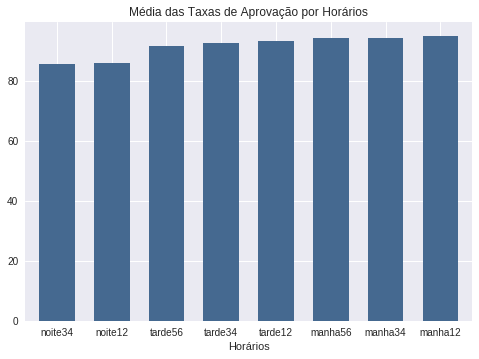

In [0]:
# formula o gráfico de barras vertical
turmas_horarios.plot.bar(x = 'horario', y = 'aprovado', color = '#456990', rot = '0', width = 0.65)

# define texto do eixo 'x'
plt.xlabel('Horários')

# oculta as legendas
plt.legend().set_visible(False)

# define o titulo do grafico
plt.title('Média das Taxas de Aprovação por Horários')

plt.show()

### 3.1.2 Gráfico das Taxas de Reprovação

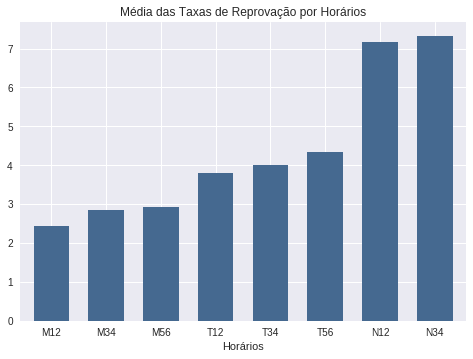

In [0]:
# formula o gráfico de barras vertical
turmas_horarios.plot.bar(x = 'horario', y = 'reprovado', color = '#456990', rot = '0', width = 0.65)

# define texto do eixo 'x'
plt.xlabel('Horários')

# oculta as legendas
plt.legend().set_visible(False)

# define o titulo do grafico
plt.title('Média das Taxas de Reprovação por Horários')

plt.show()

### 3.1.3 Gráfico das Médias de Trancamento

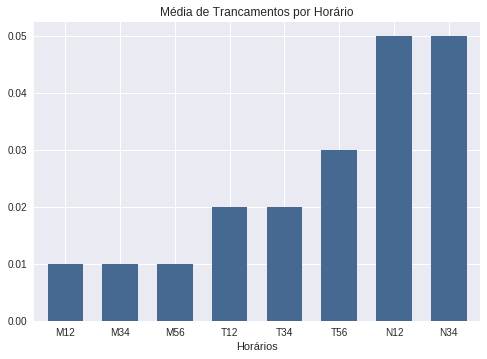

In [0]:
# formula o gráfico de barras vertical
turmas_horarios.plot.bar(x = 'horario', y = 'trancado', color = '#456990', rot = '0', width = 0.65)

# define texto do eixo 'x'
plt.xlabel('Horários')

# oculta as legendas
plt.legend().set_visible(False)

# define o titulo do grafico
plt.title('Média de Trancamentos por Horário')

plt.show()

### 3.1.4 Gráfico da Quantidade Média de Alunos

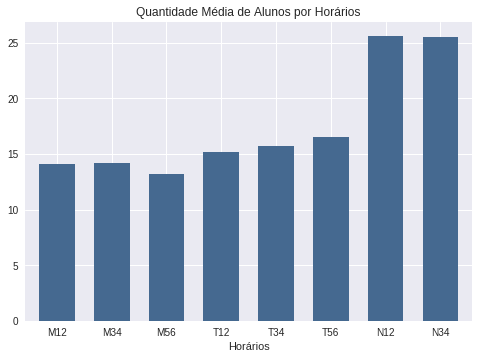

In [0]:
# formula o gráfico de barras vertical
turmas_horarios.plot.bar(x = 'horario', y = 'alunos', color = '#456990', rot = '0', width = 0.65)

# define texto do eixo 'x'
plt.xlabel('Horários')

# oculta as legendas
plt.legend().set_visible(False)

# define o titulo do grafico
plt.title('Quantidade Média de Alunos por Horários')

plt.show()

### 3.1.5 Gráfico da Média de Notas dos Alunos

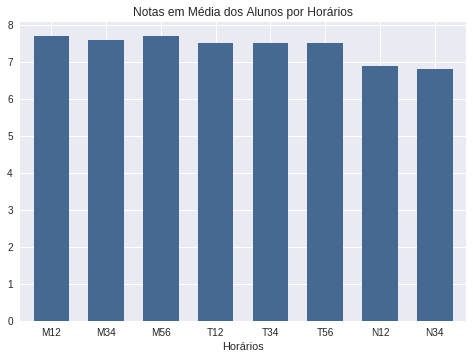

In [0]:
# formula o gráfico de barras vertical
turmas_horarios.plot.bar(x = 'horario', y = 'nota', color = '#456990', rot = '0', width = 0.65)

# define texto do eixo 'x'
plt.xlabel('Horários')

# oculta as legendas
plt.legend().set_visible(False)

# define o titulo do grafico
plt.title('Notas em Média dos Alunos por Horários')

plt.show()

### 3.1.6 Gráfico da Média de Faltas

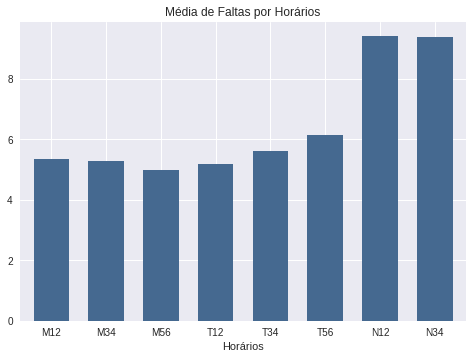

In [0]:
# formula o gráfico de barras vertical
turmas_horarios.plot.bar(x = 'horario', y = 'faltas', color = '#456990', rot = '0', width = 0.65)

# define texto do eixo 'x'
plt.xlabel('Horários')

# oculta as legendas
plt.legend().set_visible(False)

# define o titulo do grafico
plt.title('Média de Faltas por Horários')

plt.show()

## 3.2 Inferências

Ao analisar o **gráfico de taxa de aprovação**, é possível verificar a diminuição dos valores no turno noturno, mas a diferenciação não é tão perceptível. Verificando, porém, o **gráfico de reprovações**, a diferença é bem mais visível; indicando que a reprovação é mais comum nos horários noturnos — sendo mais ainda nos últimos horários da noite.

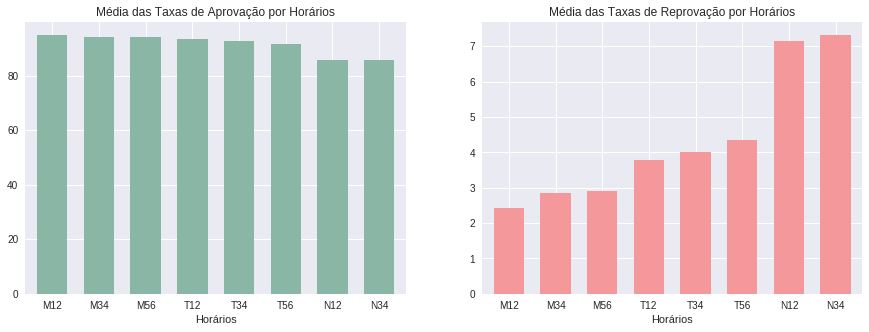

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
                         
turmas_horarios.plot.bar(ax = axes[0], x = 'horario', y = 'aprovado', color = '#89b6a5', rot = '0', width = 0.65, legend = False)

axes[0].set_title('Média das Taxas de Aprovação por Horários')
axes[0].set_xlabel('Horários')

turmas_horarios.plot.bar(ax = axes[1], x = 'horario', y = 'reprovado', color = '#f4989c', rot = '0', width = 0.65, legend = False)
                         
axes[1].set_title('Média das Taxas de Reprovação por Horários')
axes[1].set_xlabel('Horários')

plt.show()

Comportamento semelhante é visto pelo **gráfico de trancamentos**. Pode-se inferir, portanto, que trancamentos são bem mais comuns nos horários noturnos. É interessante perceber que, ao analisar o **gráfico de quantidade de alunos**, descobre-se que as turmas norturnas têm mais alunos, o que pode influenciar na quantidade de trancamentos

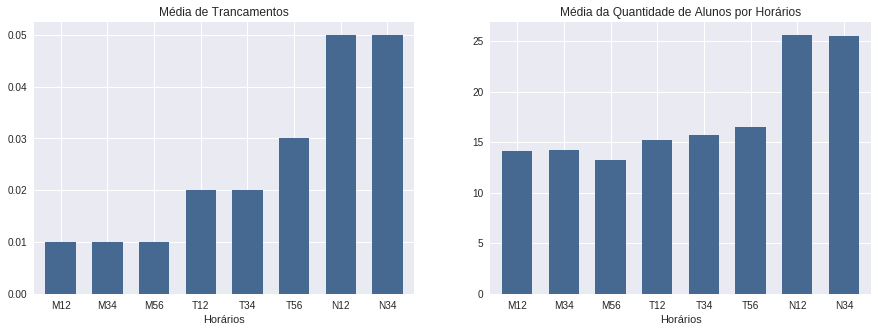

In [0]:
ig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
                         
turmas_horarios.plot.bar(ax = axes[0], x = 'horario', y = 'trancado', color = '#456990', rot = '0', width = 0.65, legend = False)

axes[0].set_title('Média de Trancamentos')
axes[0].set_xlabel('Horários')

turmas_horarios.plot.bar(ax = axes[1], x = 'horario', y = 'alunos', color = '#456990', rot = '0', width = 0.65, legend = False)
                         
axes[1].set_title('Média da Quantidade de Alunos por Horários')
axes[1].set_xlabel('Horários')

plt.show()

Analisando os gráficos anteriores, percebe-se que o rendimento dos alunos no turno noturno é inferior aos demais horários. Pode haver inúmeros fatores que não foram registrados no DataSet que expliquem esse comportamento: alunos que trabalham e estudam, cuidam de casa...
No entanto, pode-se afimar uma relação entre a taxa de faltas e o mau desempenho acadêmico: movimento perceptível no DataSet. É visível a diminuição na **média de notas dos alunos** do turno noturno.

Talvez, as faltas sejam causadas por esses mesmos fatores externos. Não podemos, porém, confimar.

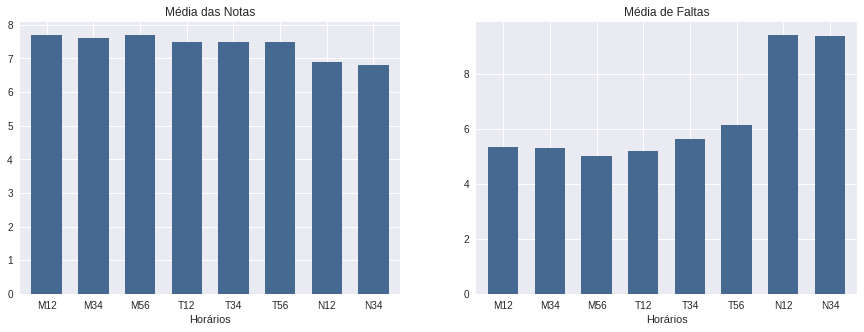

In [0]:
ig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
                         
turmas_horarios.plot.bar(ax = axes[0], x = 'horario', y = 'nota', color = '#456990', rot = '0', width = 0.65, legend = False)

axes[0].set_title('Média das Notas')
axes[0].set_xlabel('Horários')

turmas_horarios.plot.bar(ax = axes[1], x = 'horario', y = 'faltas', color = '#456990', rot = '0', width = 0.65, legend = False)
                         
axes[1].set_title('Média de Faltas')
axes[1].set_xlabel('Horários')

plt.show()

# 4 Autoria

Projeto desenvolvido por **Lucas Miguel Martiniano** e **Raul Souza Alves Pereira**.